In [3]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
data=pd.read_csv('/content/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


<Axes: >

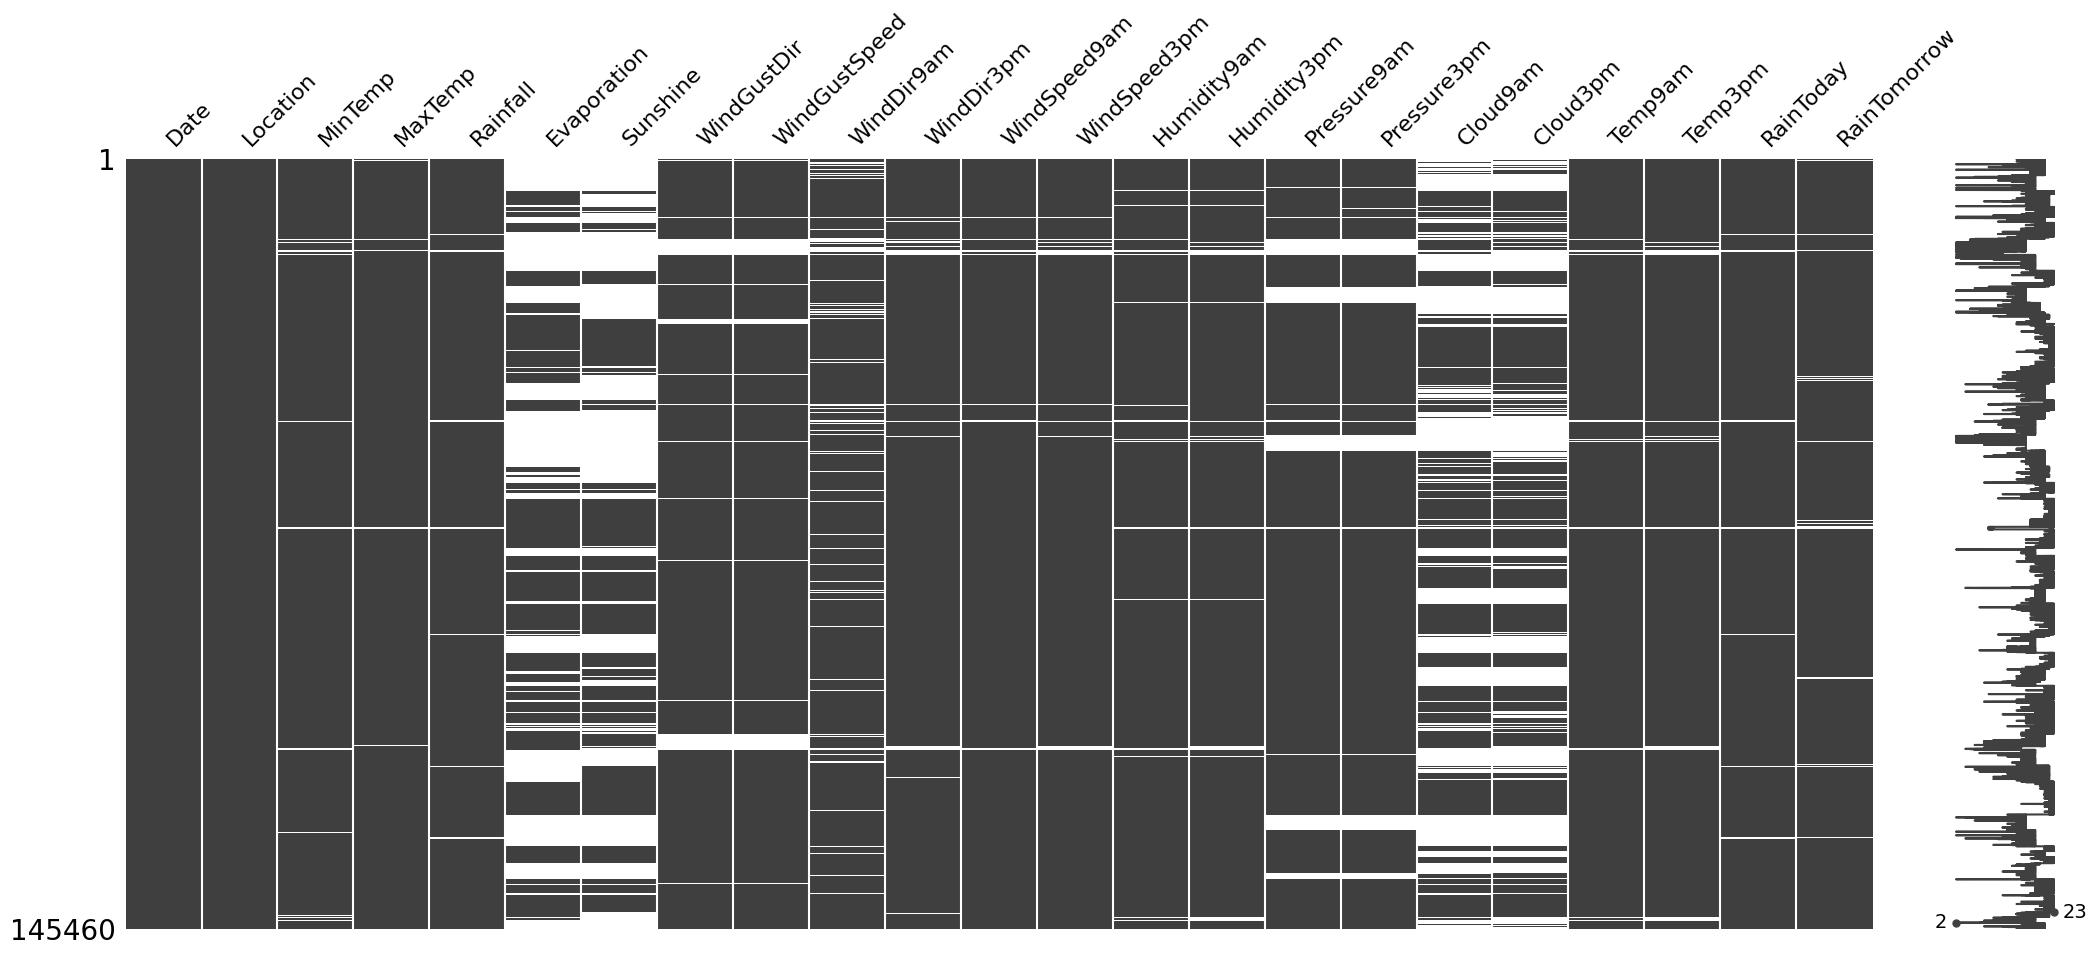

In [7]:
msno.matrix(data)

#Dealing with the missing values of the numeric values

In [8]:
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())

#Dealing with the missing values of the string values

In [9]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [10]:
data.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


**Returns** the number of unique values for each column

In [11]:
data.nunique()

,0
Date,3436
Location,49
MinTemp,390
MaxTemp,506
Rainfall,682
Evaporation,359
Sunshine,146
WindGustDir,16
WindGustSpeed,68
WindDir9am,16


In [12]:

data['Location'] = LabelEncoder().fit_transform(data['Location'])
data['WindDir9am'] = LabelEncoder().fit_transform(data['WindDir9am'])
data['WindDir3pm'] = LabelEncoder().fit_transform(data['WindDir3pm'])
data['WindGustDir'] = LabelEncoder().fit_transform(data['WindGustDir'])


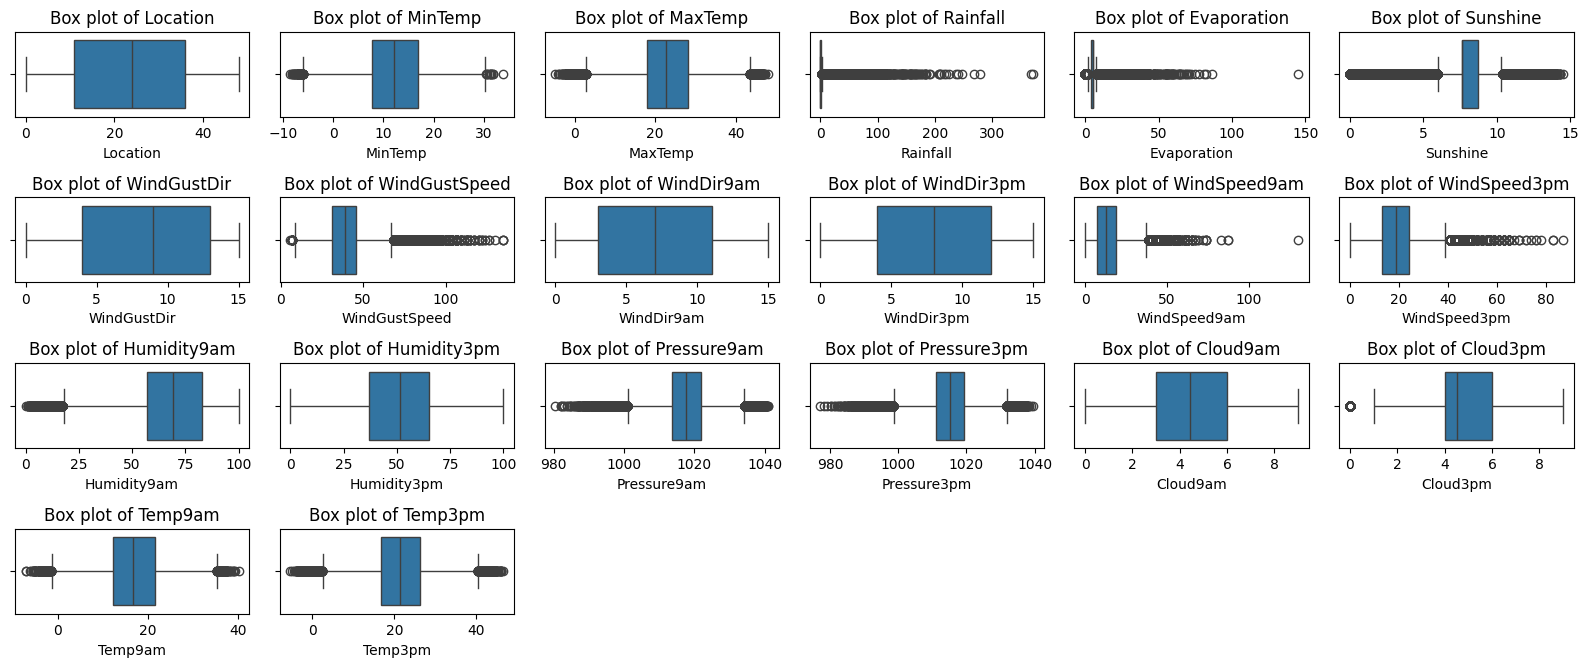

In [13]:
numerical_feature=data.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(16,8))
for i,features in enumerate (numerical_feature,1):
    plt.subplot(5,6,i)
    sns.boxplot(x=data[features])
    plt.title(f'Box plot of {features}')
plt.tight_layout()
plt.show()

In [14]:

def iqr_outliers(dataset,feature_name):

    Q1 = dataset[feature_name].quantile(0.25)
    Q3 = dataset[feature_name].quantile(0.75)

    IQR = Q3 - Q1

    lwr_bound = Q1 - 1.5 * IQR
    upp_bound = Q3 + 1.5 * IQR

    outliers_indices= dataset.index[np.logical_or(dataset[feature_name]<lwr_bound,
                                dataset[feature_name]>upp_bound)]
    return outliers_indices

outliers_detected={}
for feature in numerical_feature:
    outliers = iqr_outliers(data,feature)
    outliers_detected[feature] = outliers
    print(outliers)


Index([], dtype='int64')
Index([ 46848,  46849,  46909,  46922,  46923,  46924,  47250,  47264,  47267,
        47293,  47323,  47591,  47965,  47966,  47967,  47968,  48268,  48270,
        48299,  49215,  49598,  49962,  49963,  49964,  50302,  50306,  51006,
        51307,  51338,  52253,  52254,  52312,  52330,  52362,  52637,  52638,
        52686,  52689,  52694,  52924,  52982,  52984,  52987,  52988,  53045,
        53380,  53402,  53696,  53697,  53720,  54023,  54028,  54043,  54044,
        54052,  54053,  54346,  54347,  54365,  54378,  54402,  54410,  54411,
        54424,  54460,  54736,  54737,  54754,  54755,  54765,  54767,  64219,
        72848,  96531,  96532,  98946,  99343, 105599, 107341, 108016, 116368,
       144189],
      dtype='int64')
Index([    68,   1783,   2904,   4457,   5885,   5890,   5913,   5914,   6371,
         6372,
       ...
       137840, 138155, 138187, 144184, 144188, 144530, 144535, 144572, 144858,
       144891],
      dtype='int64', length

In [15]:

for i in numerical_feature:
    data[i] = data[i].replace(data[i].iloc[outliers_detected[i]].values,data[i].median())

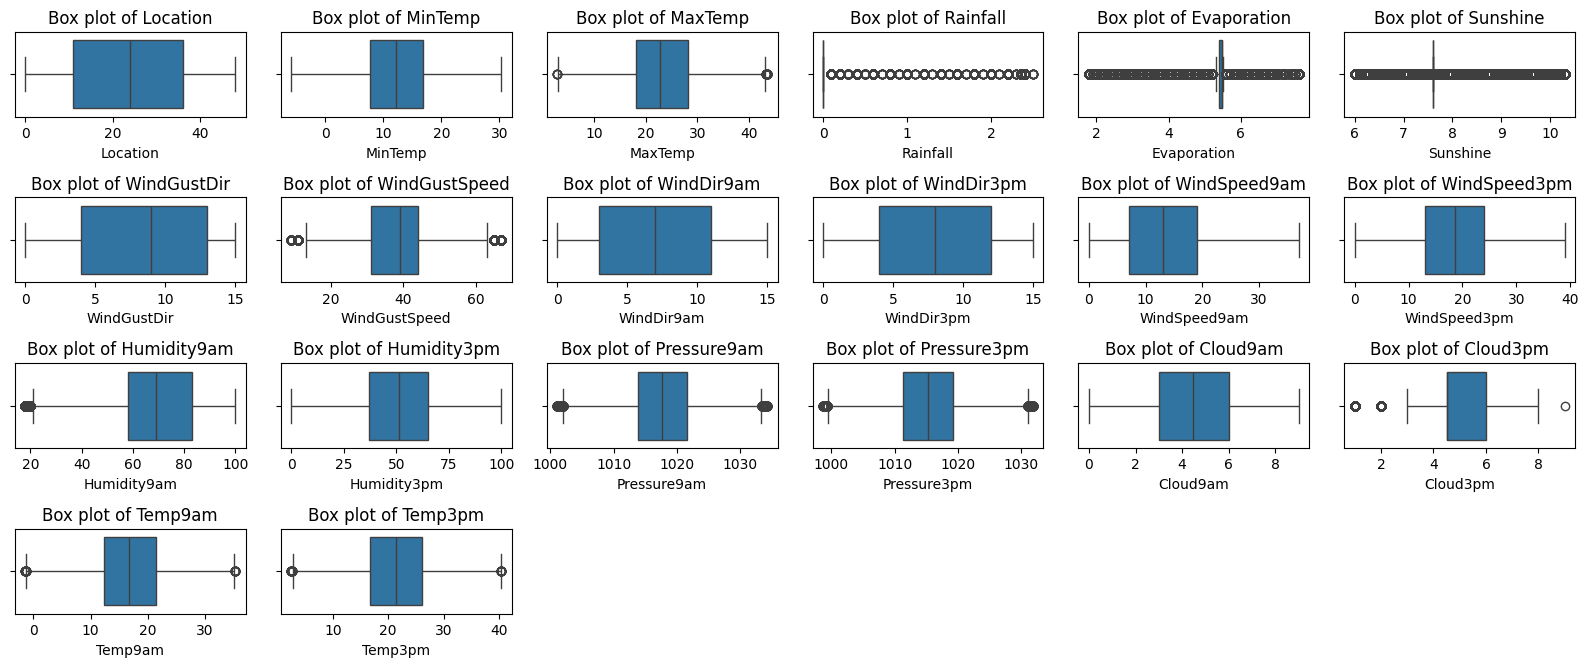

In [16]:
plt.figure(figsize=(16,8))
for i, feature in enumerate(numerical_feature,1):
    plt.subplot(5,6,i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

RainToday
0    113580
1     31880
Name: count, dtype: int64
RainTomorrow
0    113583
1     31877
Name: count, dtype: int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

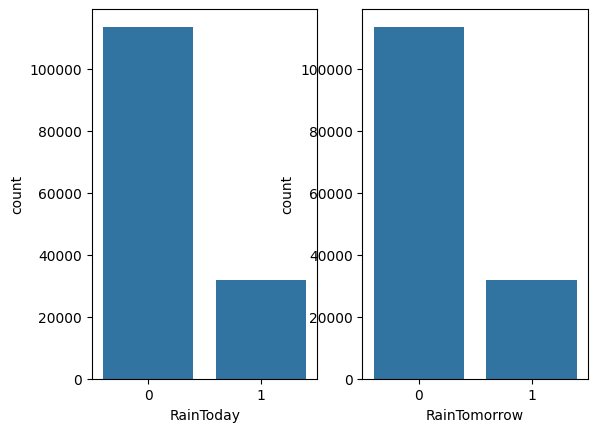

<Figure size 2000x2000 with 0 Axes>

In [17]:
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})

fig, ax =plt.subplots(1,2)
print(data.RainToday.value_counts())
print(data.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=data,x='RainToday',ax=ax[0])
sns.countplot(data=data,x='RainTomorrow',ax=ax[1])


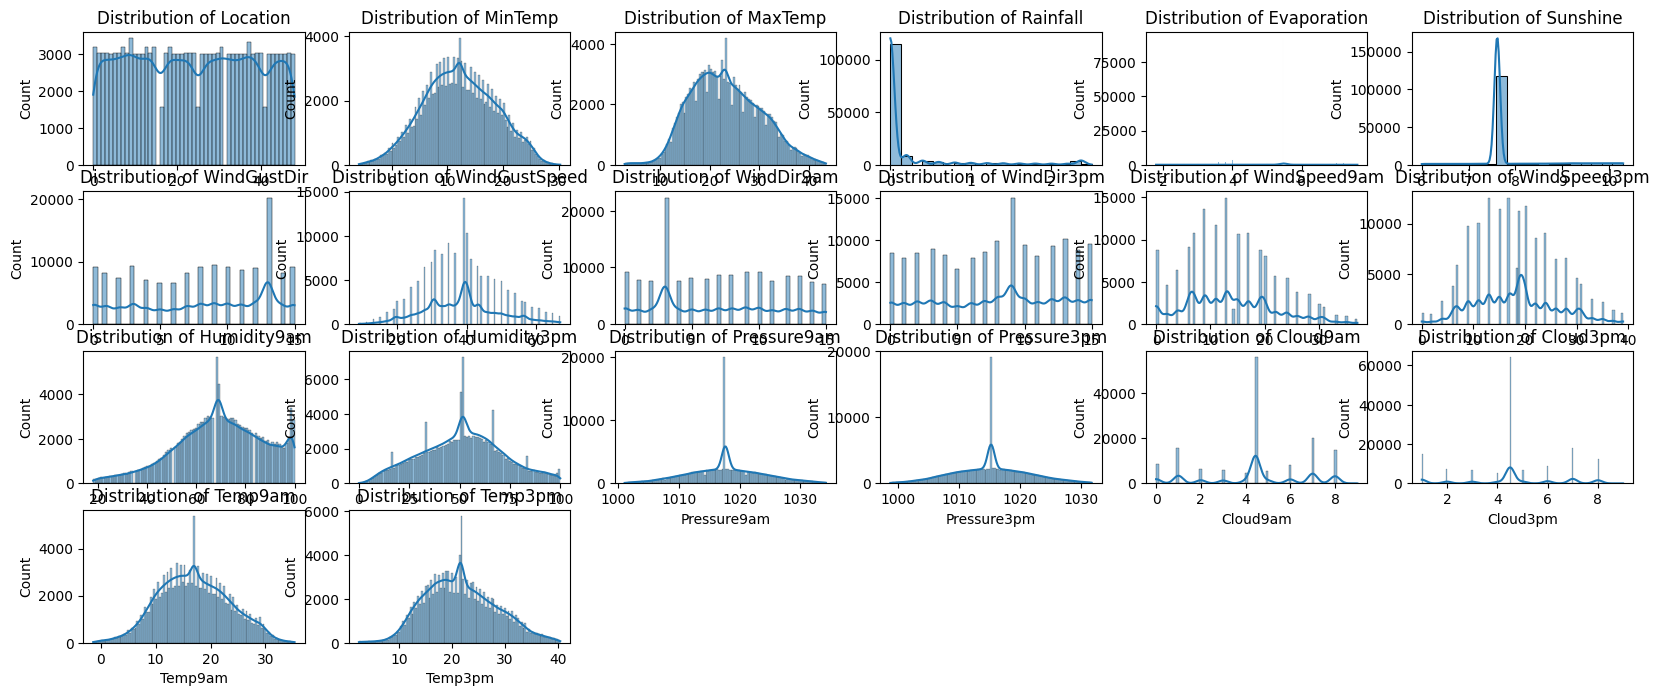

In [18]:
plt.figure(figsize=(20,10))
for i , col in enumerate(numerical_feature, 1):
    plt.subplot(5,6,i)
    sns.histplot(data[col],kde=True)
    plt.title(f'Distribution of {col}')
plt.show()

In [19]:
data.drop(['Date'],axis=1,inplace=True)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,14,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0
145458,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0


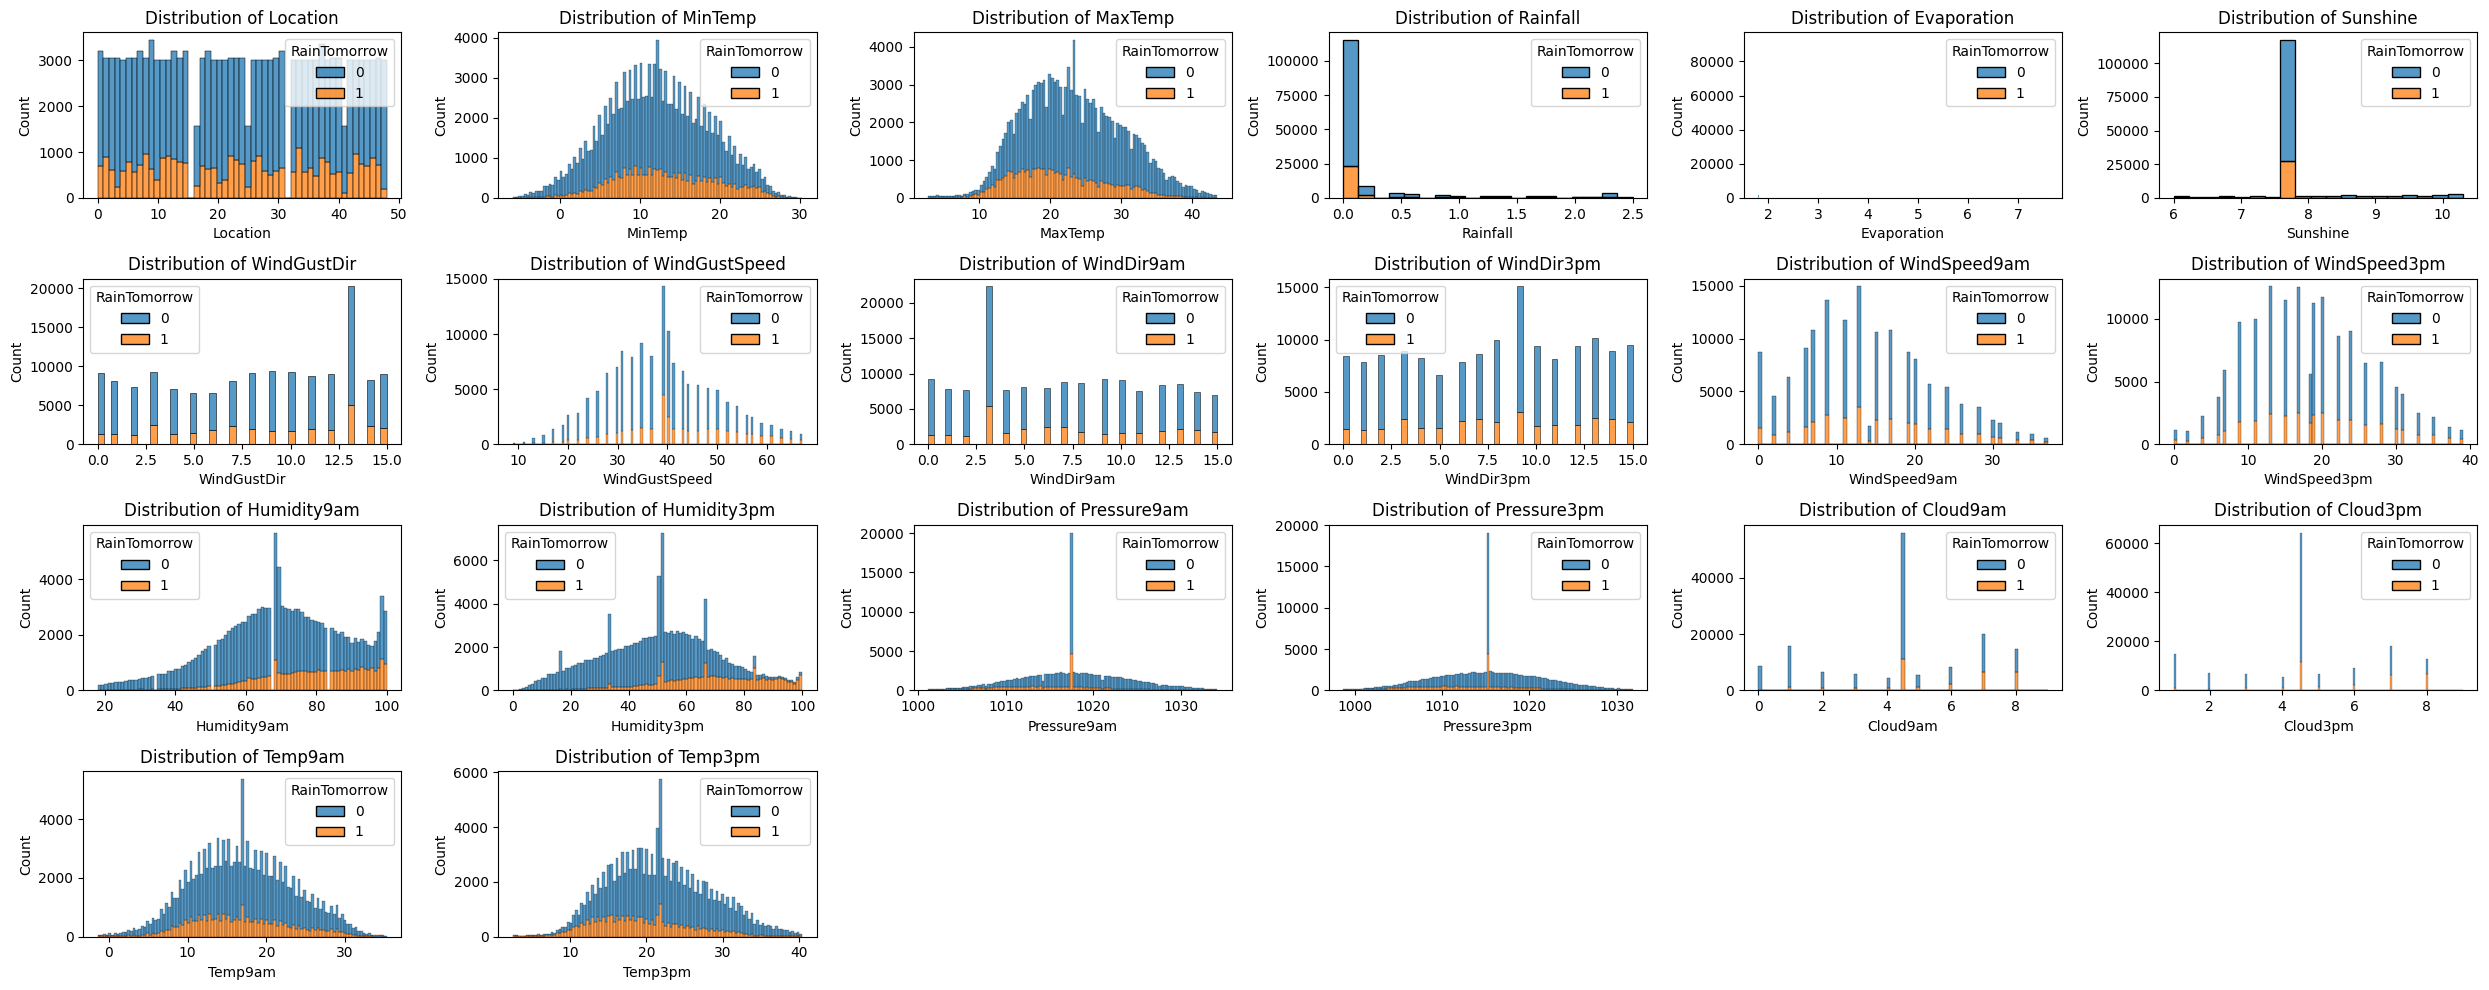

In [20]:
plt.figure(figsize=(25, 10))
for i,feature in enumerate(numerical_feature,1):
    plt.subplot(4,6,i)
    sns.histplot(data=data, x=feature, hue='RainTomorrow', multiple='stack')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

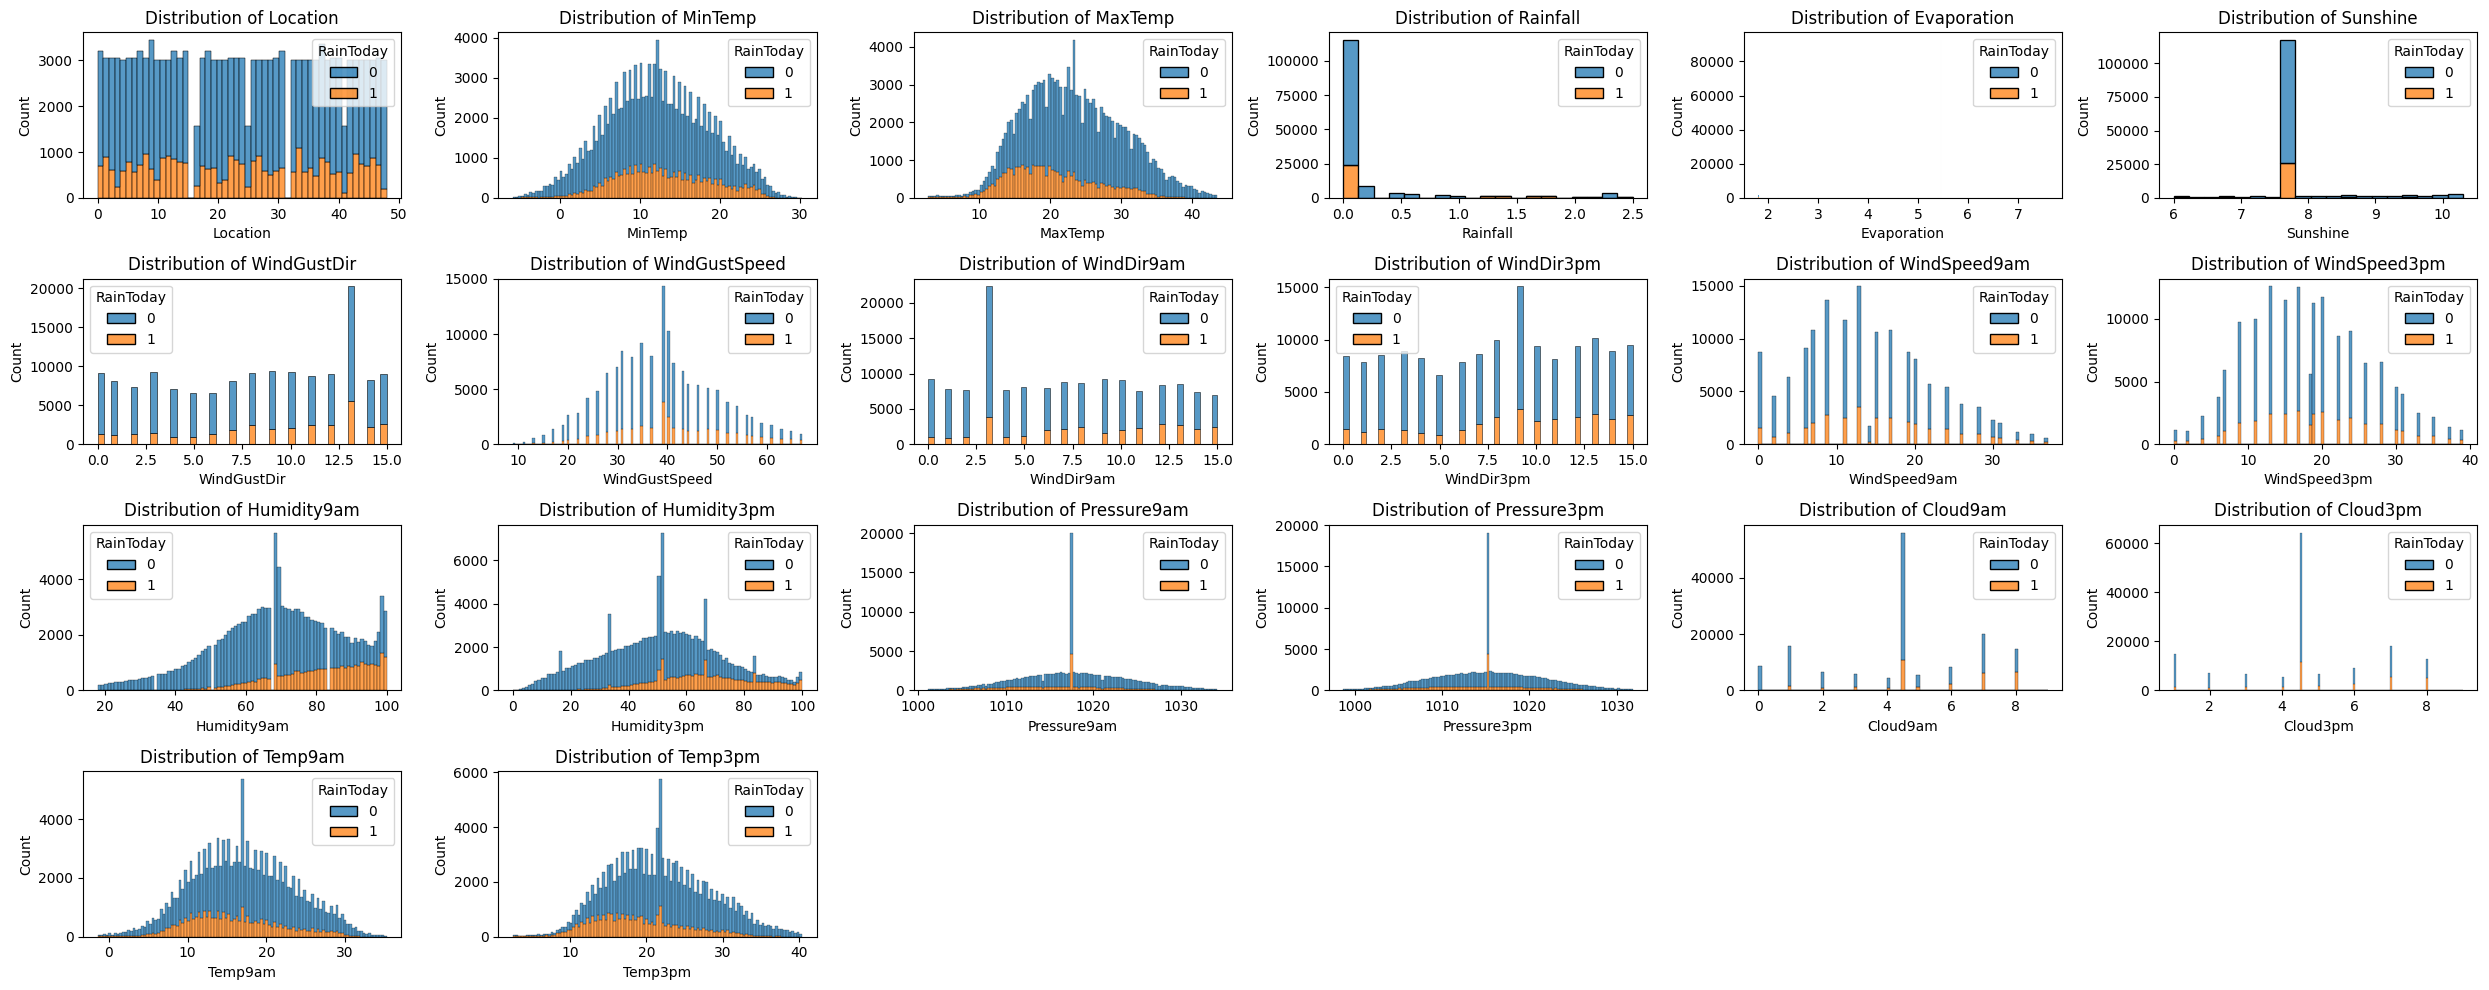

In [21]:
plt.figure(figsize=(25, 10))
for i,feature in enumerate(numerical_feature,1):
    plt.subplot(4,6,i)
    sns.histplot(data=data, x=feature, hue='RainToday', multiple='stack')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()

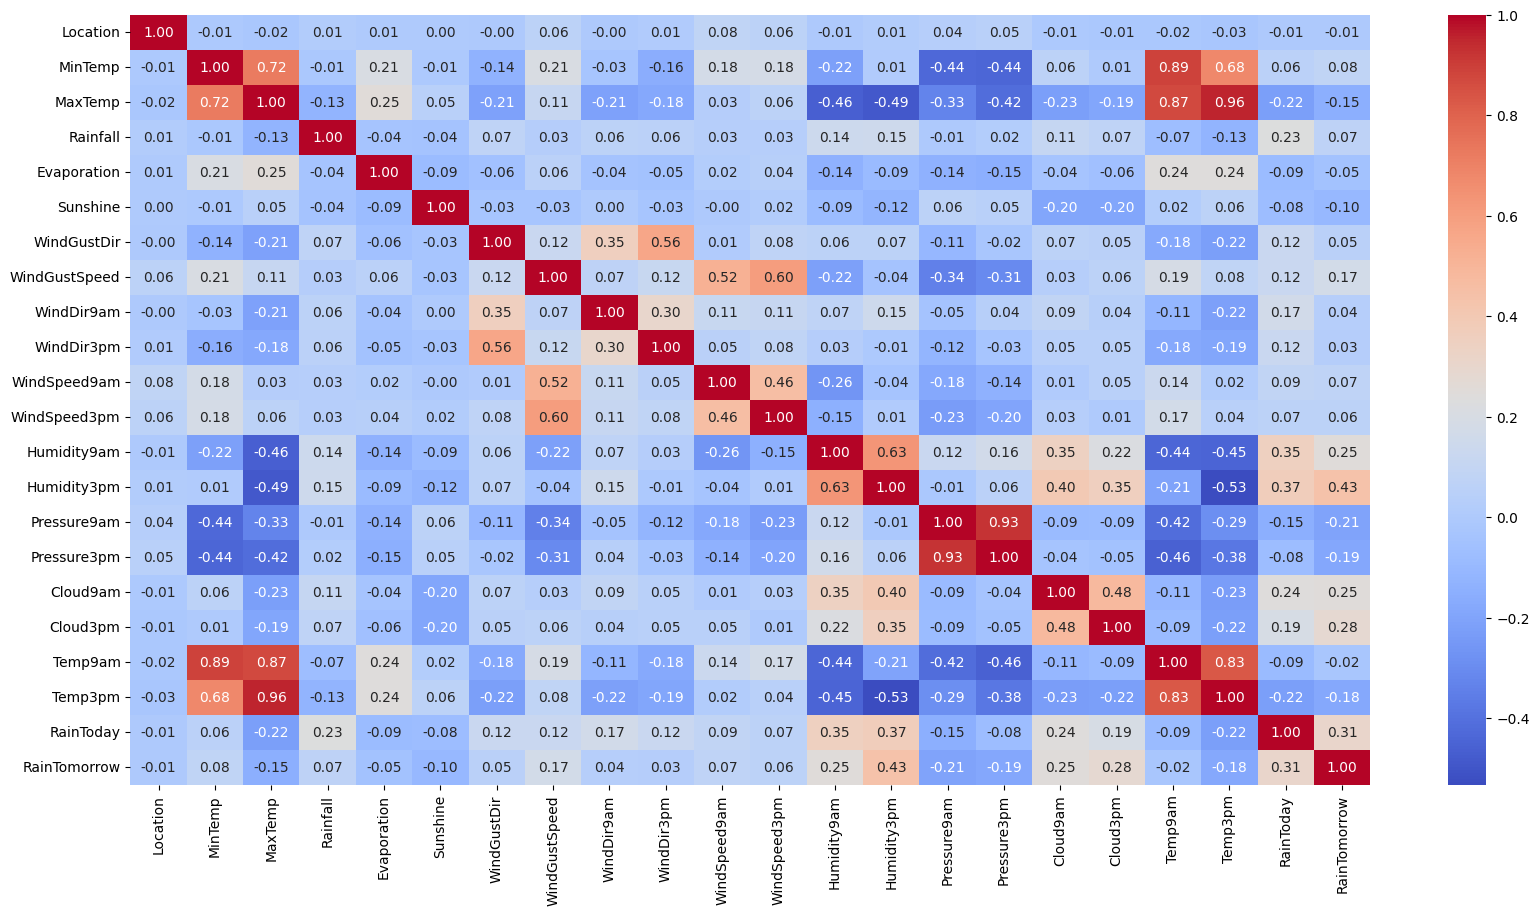

In [22]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [23]:
X = data.iloc[:, :-2]
y_today = data['RainToday']
y_tomorrow = data['RainTomorrow']

In [24]:


# For RainToday
X_train_today, X_test_today, y_train_today, y_test_today = train_test_split(
    X, y_today, test_size=0.2, random_state=42
)

# For RainTomorrow
X_train_tomorrow, X_test_tomorrow, y_train_tomorrow, y_test_tomorrow = train_test_split(
    X, y_tomorrow, test_size=0.2, random_state=42
)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale for RainToday
X_train_today_scaled = scaler.fit_transform(X_train_today)
X_test_today_scaled = scaler.transform(X_test_today)

# Scale for RainTomorrow
X_train_tomorrow_scaled = scaler.fit_transform(X_train_tomorrow)
X_test_tomorrow_scaled = scaler.transform(X_test_tomorrow)

In [26]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# For RainToday
X_train_today_resampled, y_train_today_resampled = sm.fit_resample(
    X_train_today_scaled, y_train_today
)
count_today = Counter(y_train_today_resampled)
print( count_today)


X_train_tomorrow_resampled, y_train_tomorrow_resampled = sm.fit_resample(
    X_train_tomorrow_scaled, y_train_tomorrow
)
count_tomorrow = Counter(y_train_tomorrow_resampled)
print( count_tomorrow)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Counter({1: 90884, 0: 90884})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Counter({1: 90911, 0: 90911})


#RandomForest

RainToday Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     22696
           1       0.81      0.78      0.79      6396

    accuracy                           0.91     29092
   macro avg       0.87      0.86      0.87     29092
weighted avg       0.91      0.91      0.91     29092



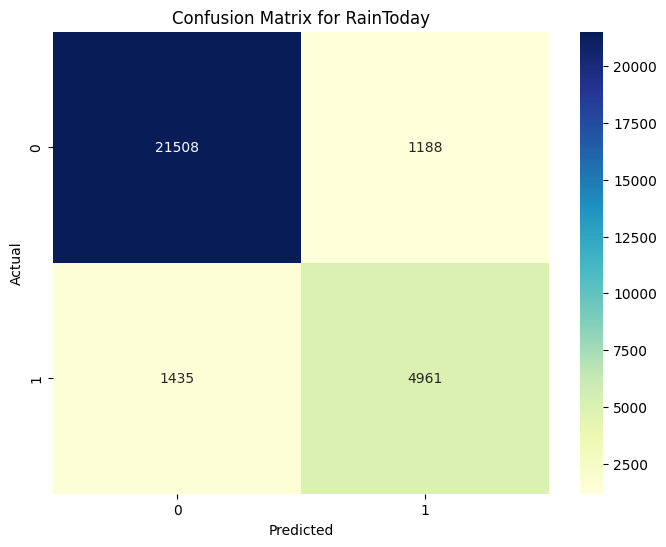

RainTomorrow Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     22672
           1       0.65      0.61      0.63      6420

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.76     29092
weighted avg       0.84      0.84      0.84     29092



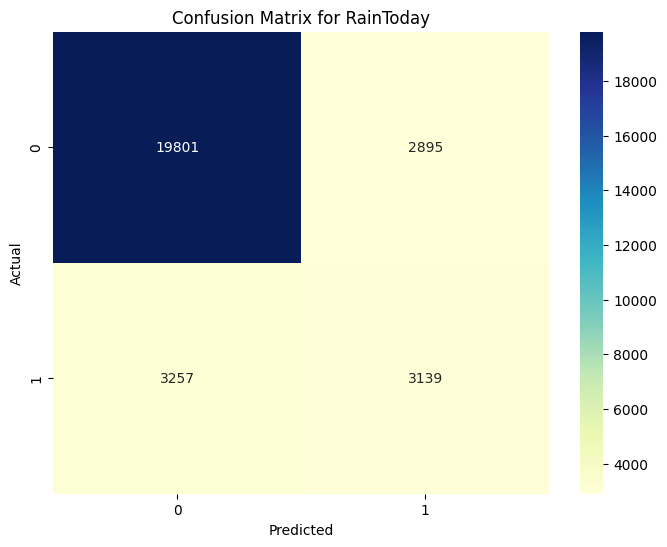

In [27]:

rf_today = RandomForestClassifier(random_state=42)
rf_today.fit(X_train_today_resampled, y_train_today_resampled)
y_pred_today = rf_today.predict(X_test_today_scaled)
print("RainToday Classification Report:\n", classification_report(y_test_today, y_pred_today))


conf_matrix = confusion_matrix(y_test_today, y_pred_today)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RainToday')
plt.show()


rf_tomorrow = RandomForestClassifier(random_state=42)
rf_tomorrow.fit(X_train_tomorrow_resampled, y_train_tomorrow_resampled)
y_pred_tomorrow = rf_tomorrow.predict(X_test_tomorrow_scaled)
print("RainTomorrow Classification Report:\n", classification_report(y_test_tomorrow, y_pred_tomorrow))


conf_matrix = confusion_matrix(y_test_today, y_pred_tomorrow)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RainToday')
plt.show()

#Logistic Regression

RainToday Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85     22696
           1       0.50      0.79      0.62      6396

    accuracy                           0.78     29092
   macro avg       0.72      0.79      0.73     29092
weighted avg       0.84      0.78      0.80     29092



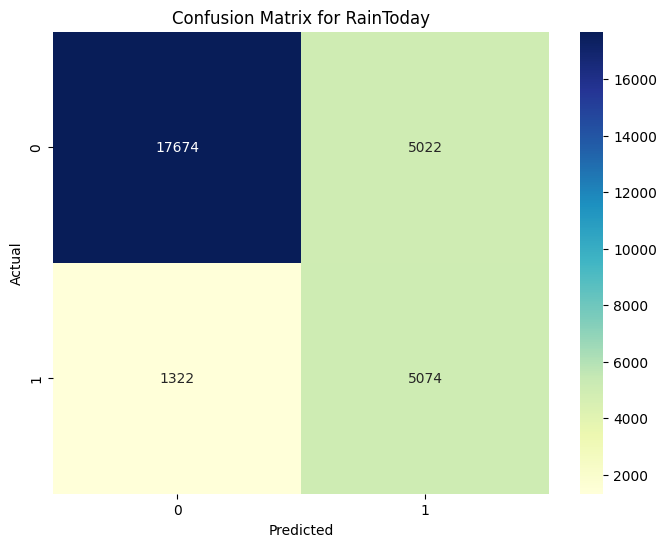

RainTomorrow Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.84     22672
           1       0.49      0.76      0.59      6420

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.82      0.77      0.79     29092



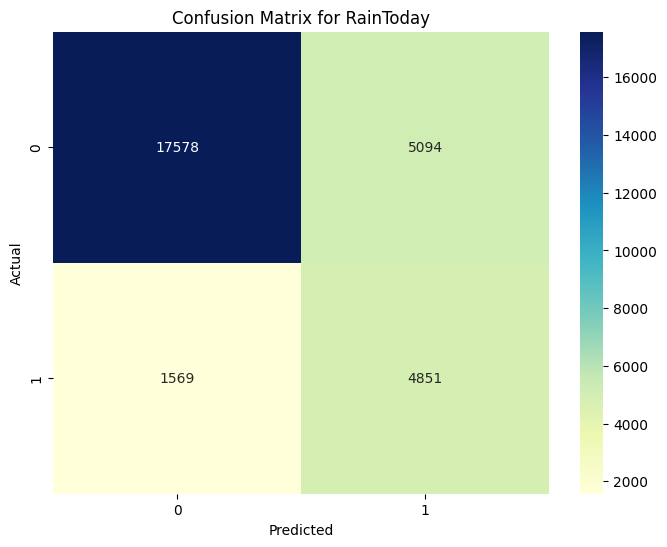

In [28]:
lr_today= LogisticRegression(random_state=42)
lr_today.fit(X_train_today_resampled, y_train_today_resampled)
y_pred_today = lr_today.predict(X_test_today_scaled)
print("RainToday Classification Report:\n", classification_report(y_test_today, y_pred_today))


conf_matrix = confusion_matrix(y_test_today, y_pred_today)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RainToday')
plt.show()


lr_tomorrow = LogisticRegression(random_state=42)
lr_tomorrow.fit(X_train_tomorrow_resampled, y_train_tomorrow_resampled)
y_pred_tomorrow = lr_tomorrow.predict(X_test_tomorrow_scaled)
print("RainTomorrow Classification Report:\n", classification_report(y_test_tomorrow, y_pred_tomorrow))

conf_matrix = confusion_matrix(y_test_tomorrow, y_pred_tomorrow)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RainToday')
plt.show()



RainToday Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91     22696
           1       0.65      0.73      0.69      6396

    accuracy                           0.86     29092
   macro avg       0.79      0.81      0.80     29092
weighted avg       0.86      0.86      0.86     29092



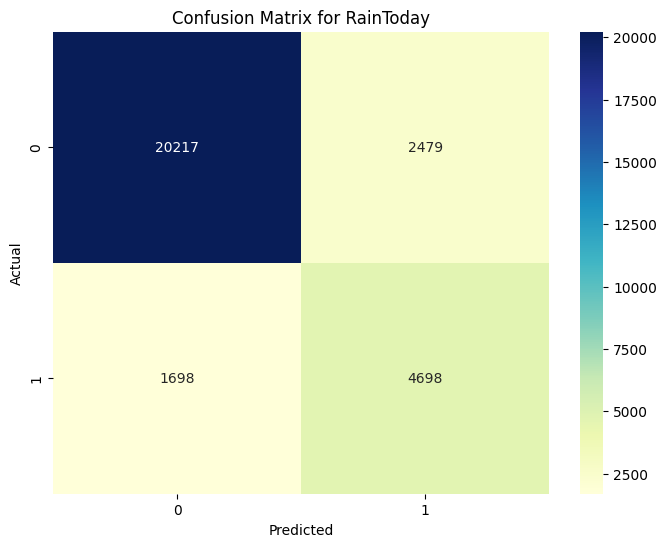

RainTomorrow Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84     22672
           1       0.47      0.54      0.50      6420

    accuracy                           0.76     29092
   macro avg       0.66      0.68      0.67     29092
weighted avg       0.78      0.76      0.77     29092



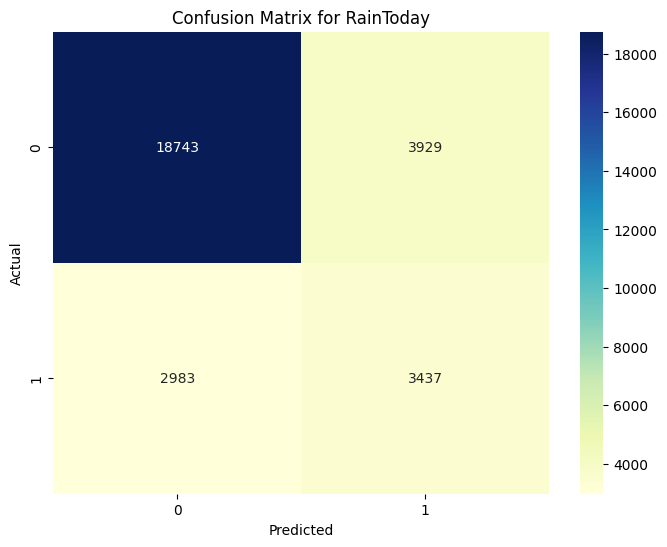

In [29]:
dt_today=DecisionTreeClassifier(random_state=42)
dt_today.fit(X_train_today_resampled, y_train_today_resampled)
y_pred_today = dt_today.predict(X_test_today_scaled)
print("RainToday Classification Report:\n", classification_report(y_test_today, y_pred_today))


conf_matrix = confusion_matrix(y_test_today, y_pred_today)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RainToday')
plt.show()


dt_tomorrow = DecisionTreeClassifier(random_state=42)
dt_tomorrow.fit(X_train_tomorrow_resampled, y_train_tomorrow_resampled)
y_pred_tomorrow = dt_tomorrow.predict(X_test_tomorrow_scaled)
print("RainTomorrow Classification Report:\n", classification_report(y_test_tomorrow, y_pred_tomorrow))


conf_matrix = confusion_matrix(y_test_tomorrow, y_pred_tomorrow)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RainToday')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
def evaluate_models(model, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return best_model


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20}
Accuracy: 0.8322562903891104
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22672
           1       0.69      0.44      0.54      6420

    accuracy                           0.83     29092
   macro avg       0.77      0.69      0.72     29092
weighted avg       0.82      0.83      0.82     29092



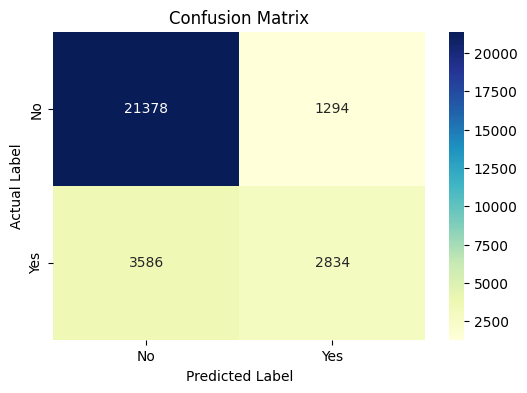

In [31]:
Decision_Tree = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
}
dt = evaluate_models(DecisionTreeClassifier(random_state=42), Decision_Tree, X_train_tomorrow, X_test_tomorrow, y_train_tomorrow, y_test_tomorrow)



Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8497868829918878
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22672
           1       0.75      0.47      0.58      6420

    accuracy                           0.85     29092
   macro avg       0.81      0.71      0.75     29092
weighted avg       0.84      0.85      0.84     29092



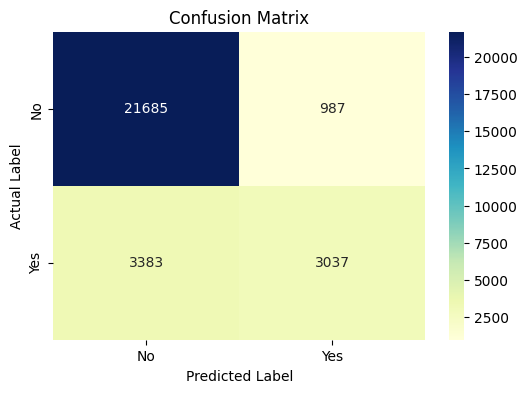

In [34]:
Random_Forest = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
}
rf = evaluate_models(RandomForestClassifier(random_state=42), Random_Forest, X_train_tomorrow, X_test_tomorrow, y_train_tomorrow, y_test_tomorrow)



Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.8304688574178468
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22672
           1       0.69      0.42      0.52      6420

    accuracy                           0.83     29092
   macro avg       0.77      0.68      0.71     29092
weighted avg       0.82      0.83      0.81     29092



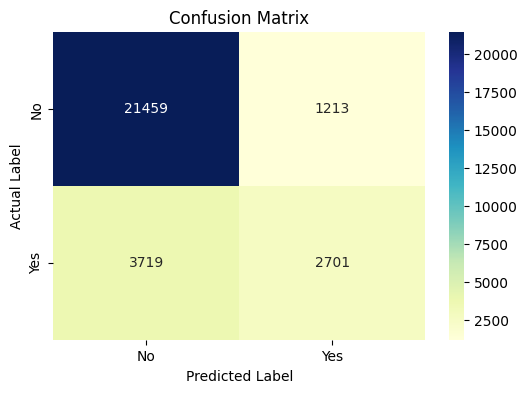

In [33]:
Logistic_regression = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

lr= evaluate_models(LogisticRegression(random_state=42), Logistic_regression, X_train_tomorrow, X_test_tomorrow, y_train_tomorrow, y_test_tomorrow)
